In [1]:
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt


In [2]:
def calculateRfMean():
    datasetPath = './DGS3MO.csv'
    dataset = pd.read_csv(datasetPath)
    data = pd.DataFrame(dataset, columns=['DATE', 'DGS3MO'])

    rfValue = data['DGS3MO']
    countValues = len(data['DGS3MO'])
    d0 = date(2018, 1, 2)
    d1 = date(2021, 7, 19)
    delta = d1 - d0
    sum = 0

    for i in range(len(data['DGS3MO'])):
        sum = sum + float(rfValue[i])

    avgRf = sum/delta.days
    #print("avgRf in: ", avgRf)
    return avgRf

## Pull the stock price data

In [3]:
#calculus of mean risk-free rate from 'start' to 'end' date
avgRfRes = calculateRfMean()
avgRfDecimal = avgRfRes / 10
avgRfDecimal_str = str(avgRfDecimal)[ 0 : 5 ]
avgRf = float(avgRfDecimal_str)

print("calculated avg Rf in a period from 2018-01-01 to 2021-07-19: ",avgRf)

start = datetime(2017, 12, 31)
end = datetime(2019, 7, 19)

#import data
df = data.DataReader(['TSLA', 'JNJ', 'MA', 'DIS', 'AAL'], 'yahoo', start, end)

#print(df)

calculated avg Rf in a period from 2018-01-01 to 2021-07-19:  0.086


In [4]:
#get closing price
df = df['Adj Close']
#df = df.pct_change().dropna()
print(df)


Symbols          TSLA         JNJ          MA         DIS        AAL
Date                                                                
2018-01-02  64.106003  126.761429  148.906738  108.726067  51.647556
2018-01-03  63.450001  127.972343  150.778992  109.192856  51.014027
2018-01-04  62.924000  127.963219  152.729645  109.144241  51.335667
2018-01-05  63.316002  129.019348  155.895767  108.551003  51.316177
2018-01-08  67.281998  129.183212  156.367020  106.994995  50.809345
...               ...         ...         ...         ...        ...
2019-07-15  50.700001  127.675995  276.529236  144.196075  33.261063
2019-07-16  50.476002  125.581367  273.807159  143.440613  33.864731
2019-07-17  50.972000  124.974815  272.480804  141.720917  32.914696
2019-07-18  50.708000  125.173851  273.965546  140.786514  33.389717
2019-07-19  51.636002  123.505737  272.797577  139.017120  32.736568

[389 rows x 5 columns]


In [5]:
#It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.
# Percentage change in stock prices (everyday)
# log of returns is time additive!!
logChange = df.pct_change().apply(lambda x: np.log(1 + x))
print("logChange:\n",logChange)

logChange:
 Symbols         TSLA       JNJ        MA       DIS       AAL
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.010286  0.009507  0.012495  0.004284 -0.012342
2018-01-04 -0.008325 -0.000071  0.012854 -0.000445  0.006285
2018-01-05  0.006210  0.008220  0.020518 -0.005450 -0.000380
2018-01-08  0.060755  0.001269  0.003018 -0.014438 -0.009926
...              ...       ...       ...       ...       ...
2019-07-15  0.033779  0.003048 -0.000608  0.001242 -0.005045
2019-07-16 -0.004428 -0.016542 -0.009892 -0.005253  0.017987
2019-07-17  0.009778 -0.004842 -0.004856 -0.012061 -0.028455
2019-07-18 -0.005193  0.001591  0.005434 -0.006615  0.014329
2019-07-19  0.018135 -0.013416 -0.004272 -0.012648 -0.019755

[389 rows x 5 columns]


In [6]:
#let's calculate variance
tesla = logChange['TSLA']
jj = logChange['JNJ']
mastercard = logChange['MA']
disney = logChange['DIS']
americanAirlines = logChange['AAL']

var_tesla = tesla.var()
var_jj = jj.var()
var_mastercard = mastercard.var()
var_disney = disney.var()
var_americanAirlines = americanAirlines.var()

print("\nvar_tesla:", var_tesla, "\nvar_jj:", var_jj, "\nvar_mastercard:", var_mastercard, "\nvar_disney:", var_disney,
          "\nvar_americanAirlines:", var_americanAirlines, "\n")


var_tesla: 0.0011870440951264555 
var_jj: 0.0001600236267009495 
var_mastercard: 0.00026189445073807104 
var_disney: 0.00017833704679848486 
var_americanAirlines: 0.0005955182014338496 



annual sd:
 Symbols
TSLA    1.019148
JNJ     0.374193
MA      0.478704
DIS     0.395025
AAL     0.721858
dtype: float64


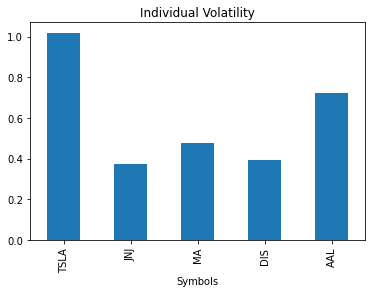

In [7]:
#Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
#3.5 stands for year unit between 01-01-2018 to 19-07-2021
ann_sd = logChange.std().apply(lambda x: x * np.sqrt(250*3.5))
print("annual sd:\n", ann_sd)
plt.title('Individual Volatility')
ann_sd.plot(kind='bar')
plt.show()


In [8]:
# covariance and correlation matrix to understand how different assets behave with respect to each other
#covariance
cov_matrix = logChange.cov()
print("covariance matrix:\n", cov_matrix)

covariance matrix:
 Symbols      TSLA       JNJ        MA       DIS       AAL
Symbols                                                  
TSLA     0.001187  0.000069  0.000183  0.000100  0.000231
JNJ      0.000069  0.000160  0.000074  0.000056  0.000066
MA       0.000183  0.000074  0.000262  0.000097  0.000158
DIS      0.000100  0.000056  0.000097  0.000178  0.000109
AAL      0.000231  0.000066  0.000158  0.000109  0.000596


In [9]:
#correlation
corr_matrix = logChange.corr()
print("correlation matrix:\n", corr_matrix)

correlation matrix:
 Symbols      TSLA       JNJ        MA       DIS       AAL
Symbols                                                  
TSLA     1.000000  0.159325  0.328894  0.216579  0.274517
JNJ      0.159325  1.000000  0.360952  0.330704  0.214654
MA       0.328894  0.360952  1.000000  0.446767  0.399294
DIS      0.216579  0.330704  0.446767  1.000000  0.334193
AAL      0.274517  0.214654  0.399294  0.334193  1.000000


individual expected return:
 Symbols
TSLA   -0.224219
JNJ     0.023416
MA      0.467255
DIS     0.283320
AAL     0.035999
dtype: float64


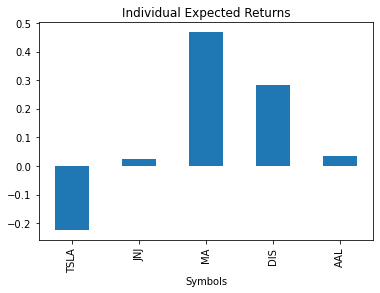

In [10]:
#expected return (individual)
#yearly returns for individual companies (argument 'Y' stands for "yearly")
#individual_expectedReturn
ind_er = df.resample('Y').last().pct_change().mean()
print("individual expected return:\n", ind_er)
ind_er.plot(kind='bar')
plt.title('Individual Expected Returns')
plt.show()

In [11]:
#now, to compute the portfolio expected return we need to multiply each return for its weight
#but we will do it later on once we have got the optimal

# Creating a table for visualising returns and volatility of individual assets
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
print("assets:\n",assets)

assets:
           Returns  Volatility
Symbols                      
TSLA    -0.224219    1.019148
JNJ      0.023416    0.374193
MA       0.467255    0.478704
DIS      0.283320    0.395025
AAL      0.035999    0.721858


1000 portfolios:
        Returns  Volatility  TSLA weight  JNJ weight  MA weight  DIS weight  \
0     0.217639    0.384883     0.063141    0.069360   0.261632    0.348181   
1     0.087554    0.428777     0.295075    0.226701   0.153372    0.263014   
2     0.152590    0.394418     0.184464    0.179674   0.266990    0.209086   
3     0.022420    0.478294     0.375250    0.219180   0.012877    0.328610   
4     0.161595    0.353506     0.053179    0.277089   0.193707    0.240109   
...        ...         ...          ...         ...        ...         ...   
9995  0.021587    0.451029     0.251495    0.234782   0.018898    0.185329   
9996 -0.028346    0.598129     0.361016    0.055563   0.038550    0.055280   
9997  0.123400    0.421874     0.223544    0.219164   0.292667    0.089416   
9998  0.291515    0.428177     0.052611    0.036739   0.572799    0.091561   
9999  0.096311    0.436821     0.274276    0.209297   0.226674    0.147835   

      AAL weight  
0       0.257685  
1      

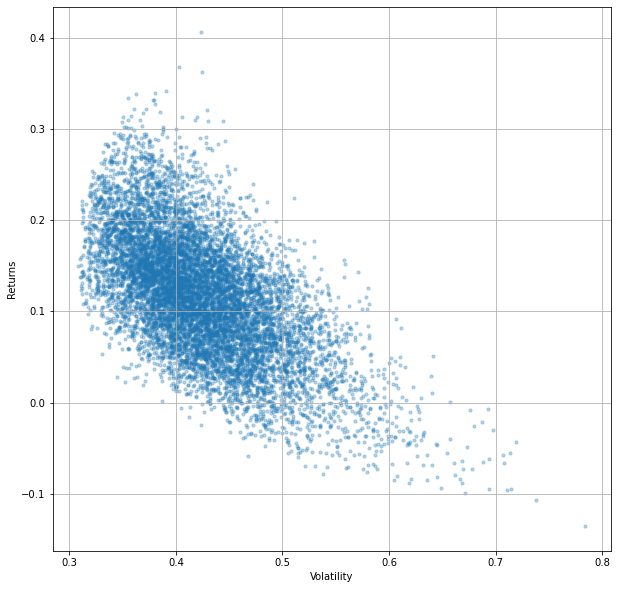

In [12]:
#Next, to plot the graph of efficient frontier, we need run a loop.
#In each iteration, the loop considers different weights for assets and calculates the return and volatility
# of that particular portfolio combination.
# We run this loop a 10000 times.

p_ret = []  # Define an empty array for portfolio returns
p_vol = []  # Define an empty array for portfolio volatility
p_weights = []  # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er)  # Returns are the product of individual expected returns of asset and its
    # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()  # Portfolio Variance
    sd = np.sqrt(var)  # Daily standard deviation
    ann_sd = sd * np.sqrt(250*3.5)  # Annual standard deviation = volatility
    p_vol.append(ann_sd)

resultData = {'Returns': p_ret, 'Volatility': p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    # print(counter, symbol)
    resultData[symbol + ' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(resultData)
print("1000 portfolios:\n",portfolios) # Dataframe of the 1000 portfolios created

#There are a number of portfolios with different weights, returns and volatility
#Plotting the returns and volatility from this dataframe will show the efficient frontier for our portfolio.

#plt.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10, 10])
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10, 10])
plt.show()



min_vol_port: 
 Returns        0.149547
Volatility     0.308064
TSLA weight    0.008315
JNJ weight     0.508122
MA weight      0.078513
DIS weight     0.356808
AAL weight     0.048242
Name: 1461, dtype: float64


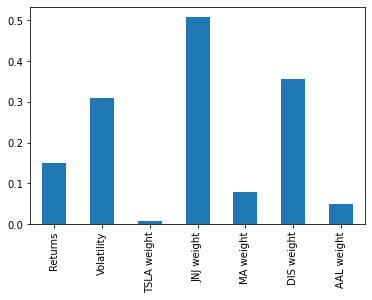

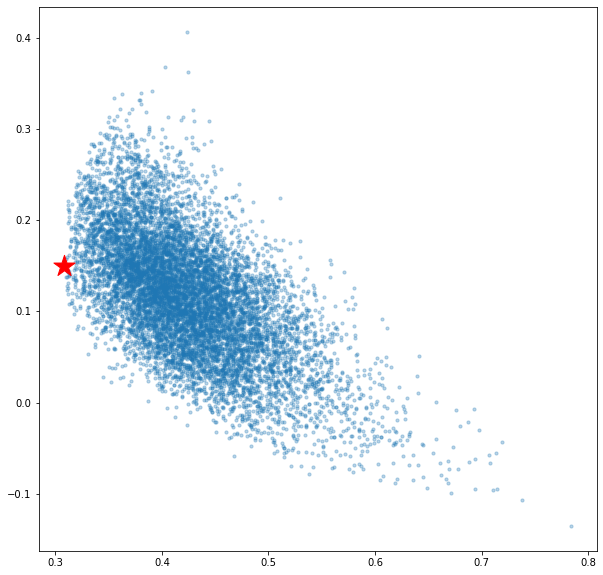

In [13]:
#On this graph, we can see the combination of weights that will give all possible combinations:
#Minimum volatility (left most point), Maximum returns (top most point) and everything in between

#let's calculate minimum volatility portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
print("\nmin_vol_port: \n",min_vol_port)

#minimum volatility is in this portfolio (min_vol_port)
#now we'll plot this point on the efficient frontier graph

#histogram
min_vol_port.plot.bar(min_vol_port)

# plotting the minimum volatility portfolio
plt.subplots(figsize=[10, 10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

plt.show()


optimal_risky_port: 
 Returns        0.406213
Volatility     0.423652
TSLA weight    0.013147
JNJ weight     0.065961
MA weight      0.806829
DIS weight     0.107210
AAL weight     0.006854
Name: 1583, dtype: float64


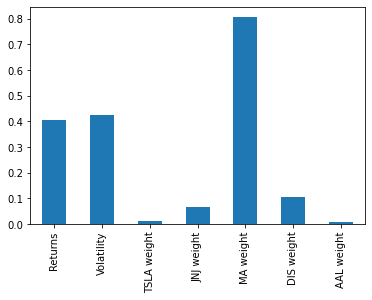

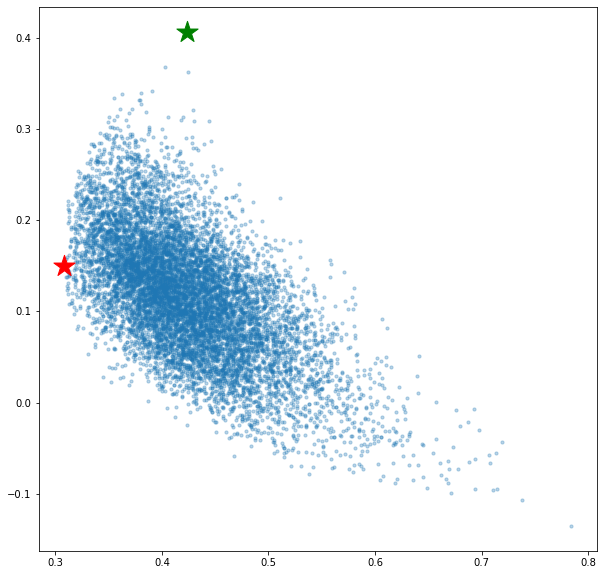

In [14]:
#The optimal risky portfolio is the one with the highest Sharpe ratio (cfr formula)
#Now we need to define the risk factor in order to find optimal portfolio

rf = avgRf

optimal_risky_port = portfolios.iloc[((portfolios['Returns'] - rf) / portfolios['Volatility']).idxmax()]
print("\noptimal_risky_port: \n", optimal_risky_port)

#histogram
optimal_risky_port.plot.bar(optimal_risky_port)

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

plt.show()

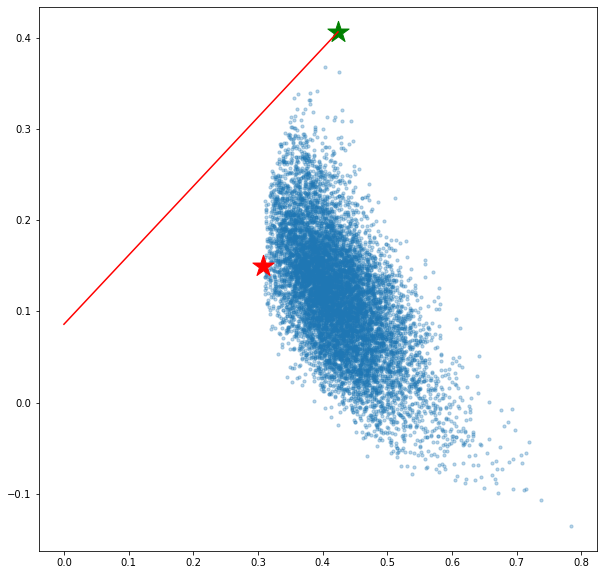

In [17]:
#plot capital market line
cml_x = []
cml_y = []
utility = []
a = 2

#utility can be seen as a measure of relative satisfaction of the investments.
#investors is risk saver (preferrs high return)
#E(R) = expected return of investment
#sd = risk of investment
#A = measure of risk adversion (higher A, higher risk?)

for er in np.linspace(rf, max(portfolios['Returns'])):
    sd = (er -rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    cml_x.append(sd)
    cml_y.append(er)
    calculateUtility = er - .5 * a * (sd ** 2)
    utility.append(calculateUtility)

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.plot(cml_x, cml_y, color='r')
plt.show()

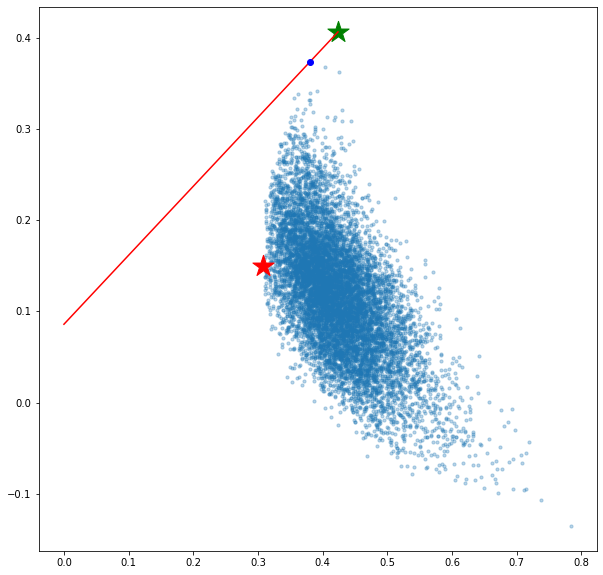

In [20]:
#investor's optimal portfolio
data2 = {'utility': utility, 'cml_y': cml_y, 'cml_x': cml_x}
cml = pd.DataFrame(data2)
investors_port = cml.iloc[cml['utility'].idxmax()]

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.plot(cml_x, cml_y, color='r')
plt.plot(investors_port[2], investors_port[1], 'o', color='b')


plt.show()